In [1]:
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from pyESN import ESN 

import RSI as rsi
import CPM as cpm
import importlib
import MovingAverage as ma
import Stochastic as st
importlib.reload(ma)
importlib.reload(cpm)
importlib.reload(st)
importlib.reload(rsi)

<module 'RSI' from 'C:\\Users\\jpran\\Capstone\\RSI.py'>

In [2]:
name = 'XOM' #Exxon Mobil
ticker = yf.Ticker(name)
ori_df = ticker.history(interval='1d', period='10y', auto_adjust=False)

In [3]:
ori_df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

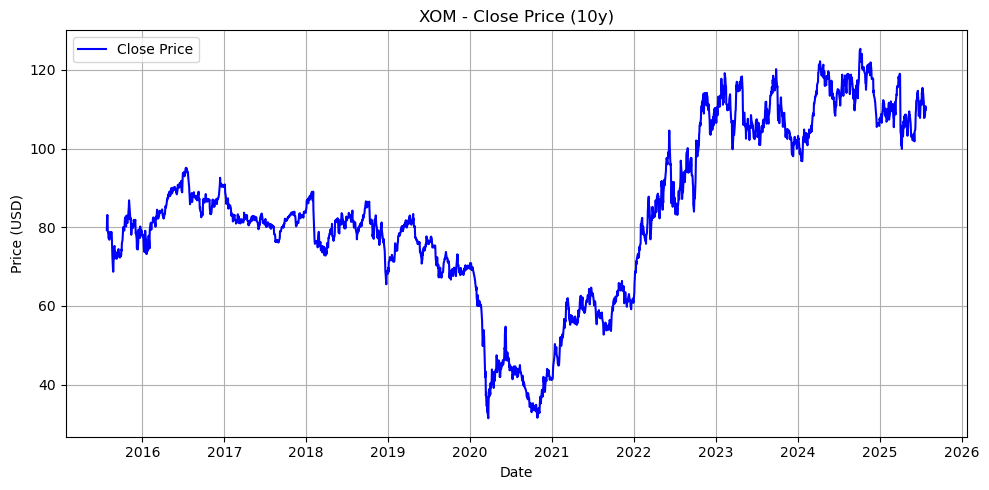

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(ori_df.index, ori_df['Close'], label='Close Price', color='blue')
plt.title(f'{name} - Close Price (10y)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
df = ori_df.copy()

In [6]:
cpm_points, df_with_cpm = cpm.cpm_model(df, column='Close',P=0.09, T=5)

In [7]:
df_with_cpm.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,is_cpm_point,cpm_point_type
Date,,,,,,,,,,
2015-07-27 00:00:00-04:00,79.230003,80.129997,78.970001,79.260002,51.145775,14996100,0.0,0.0,True,0
2015-07-28 00:00:00-04:00,79.699997,82.669998,79.570000,82.480003,53.223595,19777300,0.0,0.0,False,0
2015-07-29 00:00:00-04:00,82.180000,83.199997,81.910004,83.139999,53.649513,13913800,0.0,0.0,False,0
2015-07-30 00:00:00-04:00,83.180000,83.320000,82.419998,83.010002,53.565613,11139900,0.0,0.0,False,0
2015-07-31 00:00:00-04:00,81.669998,81.669998,78.930000,79.209999,51.113503,26232700,0.0,0.0,False,0


In [8]:
len(cpm_points)

733

In [9]:
df_with_cpm['cpm_point_type'].describe()

count    2515.000000
mean       -0.021074
std         0.538820
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: cpm_point_type, dtype: float64

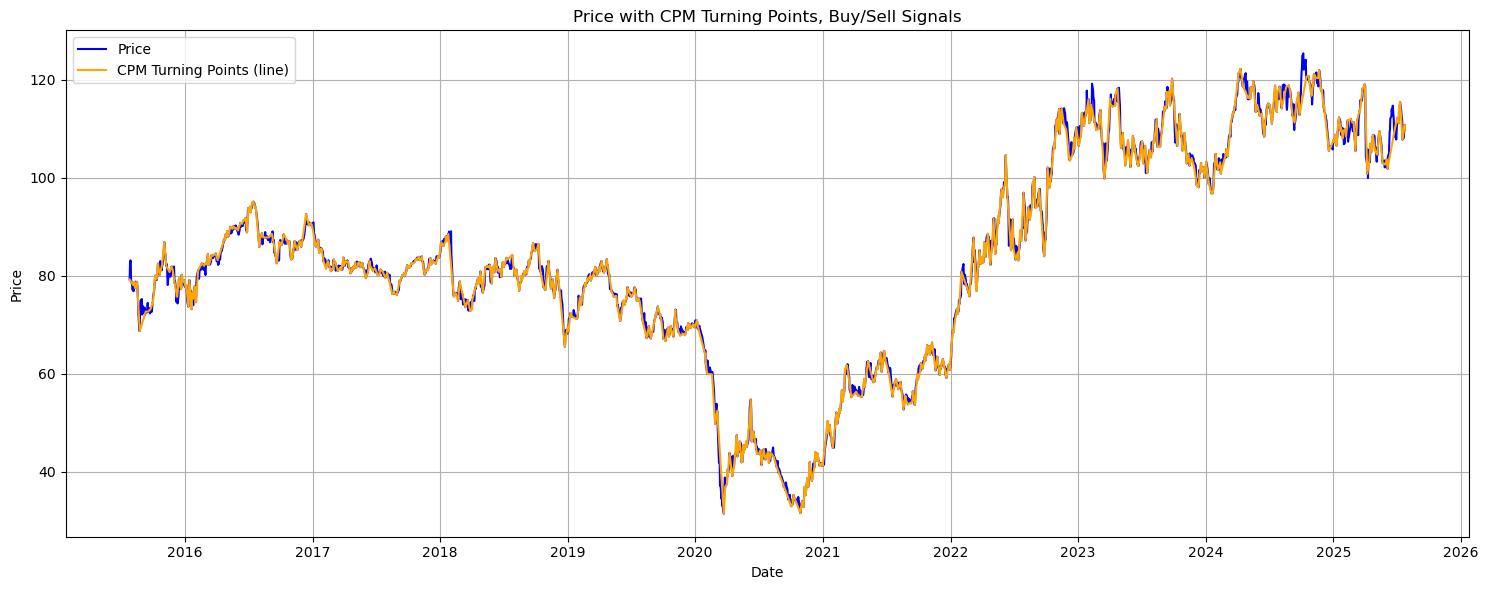

In [10]:
# CPM 신호가 있는 인덱스와 가격
cpm_indices = df_with_cpm[df_with_cpm['is_cpm_point'] == True].index
cpm_prices = df_with_cpm.loc[cpm_indices, 'Close']

# Buy (1) / Sell (-1) 인덱스와 가격
buy_indices = df_with_cpm[df_with_cpm['cpm_point_type'] == 1].index
sell_indices = df_with_cpm[df_with_cpm['cpm_point_type'] == -1].index
buy_prices = df_with_cpm.loc[buy_indices, 'Close']
sell_prices = df_with_cpm.loc[sell_indices, 'Close']

plt.figure(figsize=(15, 6))

# 1. 전체 가격 라인
plt.plot(df.index, df_with_cpm['Close'], label='Price', color='blue')

# 2. CPM 전환점을 선으로 연결
plt.plot(cpm_indices, cpm_prices, label='CPM Turning Points (line)', color='orange')

# 3. Buy 시점 (▲ 초록색)
#plt.scatter(buy_indices, buy_prices, label='Buy Signal', marker='^', color='green', s=100)

# 4. Sell 시점 (▼ 빨간색)
#plt.scatter(sell_indices, sell_prices, label='Sell Signal', marker='v', color='red', s=100)

plt.title("Price with CPM Turning Points, Buy/Sell Signals")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
if not isinstance(df_with_cpm.index, pd.DatetimeIndex):
    df_with_cpm.index = pd.to_datetime(df_with_cpm.index)
if df_with_cpm.index.tz is not None:
    df_with_cpm.index = df_with_cpm.index.tz_localize(None)
df_with_cpm.index = df_with_cpm.index.normalize()

In [12]:
total_len = len(df)

# # 6:2:2
# train_end = int(total_len * 0.6)
# val_end = int(total_len * 0.8)

# train_df = df.iloc[:train_end]
# val_df = df.iloc[train_end:val_end]
# test_df = df.iloc[val_end:]

train_end = int(total_len * 0.7)
train_df = df_with_cpm.iloc[:train_end]
test_df = df_with_cpm.iloc[train_end:]

In [13]:
st_best_params, st_best_fitness, train_df = st.run_stochastic_ga_optimization(train_df)

print("Best Parameters:", st_best_params)
print("Best Fitness:", st_best_fitness)

유전 알고리즘 실행 중...
gen	nevals	avg    	min   	max   
0  	50    	748.984	716.51	783.73
1  	28    	inf    	716.51	inf   
2  	45    	inf    	718.24	inf   
3  	40    	inf    	716.37	inf   
4  	37    	inf    	716.37	inf   
5  	37    	inf    	716.37	inf   
6  	41    	inf    	716.37	inf   
7  	35    	inf    	716.37	inf   
8  	43    	inf    	716.51	inf   
9  	30    	inf    	715.3 	inf   
10 	36    	718.53 	715.3 	727.99
11 	39    	718.421	715.68	724.96
12 	33    	717.435	715.3 	723.7 
13 	41    	inf    	715.3 	inf   
14 	37    	inf    	715.3 	inf   
15 	34    	716.452	715.3 	727.43
16 	35    	inf    	715.3 	inf   
17 	43    	715.897	715.3 	723.75
18 	37    	inf    	715.3 	inf   
19 	38    	715.652	715.3 	726.22
20 	45    	716.058	715.3 	727.43
21 	42    	715.478	715.3 	718.5 
22 	39    	inf    	715.3 	inf   
23 	40    	inf    	715.3 	inf   
24 	37    	715.871	715.3 	726.6 
25 	41    	716.319	715.3 	730.78
26 	34    	inf    	715.3 	inf   
27 	38    	715.573	715.3 	725.42
28 	36    	715.74 	715.3 	7

In [14]:
n, a, b, c, d = st_best_params

In [15]:
test_st_signals = st.generate_stochastic_signals(test_df, n, a, b, c, d)

In [16]:
signal_map = test_st_signals.set_index('Index')['Type'].map({'BUY': -1, 'SELL': 1})
test_df['ST_Signals'] = signal_map.reindex(test_df.index).fillna(0).astype(int)

C:\Users\jpran\AppData\Local\Temp\ipykernel_18552\1151066698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['ST_Signals'] = signal_map.reindex(test_df.index).fillna(0).astype(int)


In [13]:
ma_best_params, ma_best_fitness, train_df = ma.run_MA_ga_optimization(train_df)

print("Best Parameters:", ma_best_params)
print("Best Fitness:", ma_best_fitness)

이동평균 유전 알고리즘 실행 중...
gen	nevals	avg    	min   	max   
0  	50    	651.792	632.23	673.28
1  	36    	648.988	632.23	666.5 
2  	39    	inf    	618.11	inf   
3  	38    	inf    	610.56	inf   
4  	38    	634.359	610.56	662.89
5  	35    	627.936	610.23	643.64
6  	30    	622.249	609.41	648.47
7  	36    	inf    	604.28	inf   
8  	41    	inf    	602.45	inf   
9  	38    	614.336	592.37	645.66
10 	34    	611.493	592.37	646.53
11 	40    	606.967	592.37	619.2 
12 	40    	inf    	585.8 	inf   
13 	37    	inf    	570.54	inf   
14 	35    	inf    	573.78	inf   
15 	39    	inf    	573.78	inf   
16 	39    	inf    	573.78	inf   
17 	39    	inf    	571.79	inf   
18 	44    	inf    	563.76	inf   
19 	35    	inf    	563.76	inf   
20 	38    	572.482	563.76	589.91
21 	39    	inf    	562.92	inf   
22 	34    	inf    	563.56	inf   
23 	40    	inf    	562.4 	inf   
24 	38    	inf    	561.69	inf   
25 	39    	567.096	561.69	608.67
26 	40    	569.585	561.69	598.48
27 	41    	inf    	559.62	inf   
28 	28    	564.075	556

In [18]:
N, n, a, b, c = ma_best_params

In [19]:
test_ma_signals = ma.generate_MA_signals(test_df, N, n, a, b, c)

In [20]:
signal_map = test_ma_signals.set_index('Index')['Type'].map({'BUY': -1, 'SELL': 1})
test_df['MA_Signals'] = signal_map.reindex(test_df.index).fillna(0).astype(int)

C:\Users\jpran\AppData\Local\Temp\ipykernel_18552\4009268628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['MA_Signals'] = signal_map.reindex(test_df.index).fillna(0).astype(int)


In [21]:
len(train_df['Close'])

1759

In [22]:
rsi_best_params, rsi_best_fitness, train_df = rsi.run_RSI_ga_optimization(train_df)

print("Best Parameters:", ma_best_params)
print("Best Fitness:", ma_best_fitness)

RSI 유전 알고리즘 실행 중...
gen	nevals	avg    	min   	max   
0  	50    	728.849	725.34	730.67
1  	37    	inf    	725.34	inf   
2  	39    	inf    	724.84	inf   
3  	40    	inf    	703.69	inf   
4  	37    	inf    	703.69	inf   
5  	38    	inf    	703.69	inf   
6  	37    	inf    	703.69	inf   
7  	35    	inf    	703.69	inf   
8  	38    	inf    	703.69	inf   
9  	44    	inf    	699.42	inf   
10 	39    	inf    	699.42	inf   
11 	42    	inf    	699.42	inf   
12 	45    	inf    	698.61	inf   
13 	41    	inf    	697.28	inf   
14 	36    	inf    	697.28	inf   
15 	37    	inf    	696.74	inf   
16 	37    	inf    	696.84	inf   
17 	40    	inf    	696.84	inf   
18 	44    	inf    	696.84	inf   
19 	35    	inf    	695.29	inf   
20 	37    	704.341	694.74	727.03
21 	31    	700.349	694.74	725.67
22 	40    	702.789	694.21	725.97
23 	38    	701.83 	694.21	727.03
24 	32    	700.276	694.21	724.33
25 	37    	704.788	694.21	724.33
26 	43    	702.905	694.21	724.82
27 	42    	700.023	694.21	724.33
28 	34    	699.893	694.

In [23]:
x, overbought_level, oversold_level, p, q = rsi_best_params

In [24]:
test_rsi_signals = rsi.generate_RSI_signals(test_df, x, overbought_level, oversold_level, p, q)

755 2.873329295704551


In [25]:
signal_map = test_rsi_signals.set_index('Index')['Type'].map({'BUY': -1, 'SELL': 1})
test_df['RSI_Signals'] = signal_map.reindex(test_df.index).fillna(0).astype(int)

C:\Users\jpran\AppData\Local\Temp\ipykernel_18552\1229919477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['RSI_Signals'] = signal_map.reindex(test_df.index).fillna(0).astype(int)


In [26]:
from sklearn.metrics import accuracy_score, classification_report

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
def esn_signals(train_df: pd.DataFrame, test_df: pd.DataFrame, Technical_Signals,
                n_reservoir: int = 200, spectral_radius: float = 0.95, sparsity: float = 0.1,
                signal_threshold: float = 0.5, random_state: int = 42):
    """
    ESN 모델을 학습하고 매수/매도 신호를 생성합니다.

    Args:
        train_df (pd.DataFrame): ESN 학습에 사용할 학습 데이터 (MA_Signals 포함).
        test_df (pd.DataFrame): ESN이 신호를 생성할 테스트 데이터 (MA_Signals 포함).
                                백테스팅의 실제 기간 데이터와 일치해야 합니다.
        n_reservoir (int): ESN의 Reservoir 크기.
        spectral_radius (float): Reservoir의 Spectral Radius.
        sparsity (float): Reservoir의 희소성.
        signal_threshold (float): ESN 예측값을 신호로 변환할 임계값.
        random_state (int): 난수 시드.

    Returns:
        pd.DataFrame: ESN 모델이 test_df에 대해 생성한 매수/매도 신호 DataFrame.
                      'Index', 'Close', 'Type' 컬럼을 포함합니다.
        dict: ESN 모델의 테스트 셋 예측 정확도 및 분류 리포트.
    """

    # 1. 학습 데이터 준비
    # ESN 입력 피처 (X)
    features = Technical_Signals + ['Close']

    # ESN 학습 목표 (Y) - 다음 날의 cpm_point_type을 예측
    train_df_copy = train_df.copy()
    train_df_copy['Target_cpm_point_type'] = train_df_copy['cpm_point_type'].shift(-1)

    # ESN 학습에 사용할 데이터셋 준비 (NaN 값 제거)
    df_esn_train = train_df_copy.dropna(subset=features + ['Target_cpm_point_type'])

    if df_esn_train.empty:
        print("ESN 학습을 위한 유효한 데이터가 부족합니다 (train_df).")
        return pd.DataFrame(columns=['Index', 'Close', 'Type']), {}

    X_train_raw = df_esn_train[features].values
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train_raw)

    # X_train = df_esn_train[features].values
    y_train = df_esn_train['Target_cpm_point_type'].values.astype(float)

    # 2. ESN 모델 초기화 및 학습
    n_inputs = X_train.shape[1]
    n_outputs = 1 # cpm_point_type을 예측하는 단일 연속 값 출력

    esn_model = ESN(n_inputs=n_inputs, n_outputs=n_outputs, n_reservoir=n_reservoir,
                    spectral_radius=spectral_radius, sparsity=sparsity,
                    input_scaling=1.0, # MA_Signals가 -1,0,1 이므로 1.0으로 둡니다.
                    teacher_scaling=1.0, # 목표도 -1,0,1 이므로 1.0으로 둡니다.
                    teacher_shift=0.0,
                    random_state=random_state, silent=False)

    esn_model.fit(X_train, y_train)
    print("\nESN 모델 학습 완료.")

    # 3. 테스트 데이터 준비 및 예측
    test_df_copy = test_df.copy()
    test_df_copy['Target_cpm_point_type'] = test_df_copy['cpm_point_type'].shift(-1)

    df_esn_test = test_df_copy.dropna(subset=features + ['Target_cpm_point_type'])

    if df_esn_test.empty:
        print("ESN 예측을 위한 유효한 데이터가 부족합니다 (test_df).")
        return pd.DataFrame(columns=['Index', 'Close', 'Type']), {}

    X_test_raw = df_esn_test[features].values
    X_test = scaler.transform(X_test_raw)

    # X_test = df_esn_test[features].values
    y_test = df_esn_test['Target_cpm_point_type'].values.astype(float)

    # 테스트 데이터의 원래 인덱스 및 종가 저장 (백테스팅에 필요)
    test_indices = df_esn_test.index
    test_close_prices = df_esn_test['Close']

    # ESN 모델로 테스트 데이터에 대한 예측
    esn_predictions = esn_model.predict(X_test, continuation=False)
    esn_predictions = esn_predictions.flatten()

    # 4. 예측값을 매수/매도 신호로 변환
    esn_signals_df = pd.DataFrame(index=test_indices)
    esn_signals_df['Prediction'] = esn_predictions
    esn_signals_df['Close'] = test_close_prices

    # 예측값에 따라 신호 결정
    esn_signals_df['Type_Num'] = 0 # 기본값 HOLD
    esn_signals_df.loc[esn_signals_df['Prediction'] > signal_threshold, 'Type_Num'] = 1 # SELL
    esn_signals_df.loc[esn_signals_df['Prediction'] < -signal_threshold, 'Type_Num'] = -1 # BUY

    esn_signals_df['Type'] = esn_signals_df['Type_Num'].map({-1: 'BUY', 0: 'HOLD', 1: 'SELL'})

    # 백테스팅을 위해 필요한 컬럼만 추출 (HOLD 신호 제외)
    suggested_signals_df = esn_signals_df[esn_signals_df['Type'] != 'HOLD'].reset_index(names=['Index'])[['Index', 'Close', 'Type']]

    # 5. 모델 평가 결과
    print(f"\nESN 모델 예측 결과 (Test Set):")
    y_pred_discrete = esn_signals_df['Type_Num'].values

    # y_test와 y_pred_discrete의 길이가 일치하는지 확인 (dropna로 인해 길이가 줄어들 수 있음)
    if len(y_test) == len(y_pred_discrete):
        accuracy = accuracy_score(y_test, y_pred_discrete)
        report = classification_report(y_test, y_pred_discrete, zero_division=0)
        print(f"Accuracy: {accuracy:.4f}")
        print(report)
        performance_metrics = {
            'Accuracy': accuracy,
            'Classification_Report': report
        }
    else:
        print("경고: 실제 값(y_test)과 예측 신호(y_pred_discrete)의 길이가 일치하지 않습니다.")
        print(f"y_test 길이: {len(y_test)}, y_pred_discrete 길이: {len(y_pred_discrete)}")
        performance_metrics = {}

    return suggested_signals_df, performance_metrics

In [29]:
Technical_Signals = ['MA_Signals', 'RSI_Signals']

In [30]:
signals, performance_metrics = esn_signals(train_df, test_df, Technical_Signals, n_reservoir=400,
                                          spectral_radius=0.9,  sparsity=0.8, 
                                           signal_threshold=0.8, random_state=42)

harvesting states...
fitting...
training error:
0.4506542311636383

ESN 모델 학습 완료.

ESN 모델 예측 결과 (Test Set):
Accuracy: 0.4987
              precision    recall  f1-score   support

        -1.0       0.33      0.13      0.19       176
         0.0       0.54      0.84      0.66       403
         1.0       0.25      0.07      0.11       175

    accuracy                           0.50       754
   macro avg       0.37      0.35      0.32       754
weighted avg       0.42      0.50      0.42       754



In [31]:
signals_df_indexed = signals.set_index('Index')
signals_df_indexed.index = pd.to_datetime(signals_df_indexed.index)

In [32]:
test_df['Predicted_Signals'] = 0

C:\Users\jpran\AppData\Local\Temp\ipykernel_18552\1352120646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Predicted_Signals'] = 0


In [33]:
signal_mapping = {'BUY': -1, 'SELL': 1}
signals_df_indexed['Mapped_Type'] = signals_df_indexed['Type'].map(signal_mapping)

In [34]:
signal_series = signals_df_indexed['Mapped_Type'].reindex(test_df.index, fill_value=0)
test_df['Predicted_Signals'] = signal_series.astype(int)

C:\Users\jpran\AppData\Local\Temp\ipykernel_18552\2732084067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Predicted_Signals'] = signal_series.astype(int)


In [35]:
from backtesting import Backtest, Strategy

C:\Users\jpran\AppData\Roaming\Python\Python312\site-packages\backtesting\_plotting.py:55: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support, such as old IDEs. Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [36]:
class PredictedSignalStrategy(Strategy):
    def init(self):
        self.signal = self.I(lambda x: x, self.data.Predicted_Signals, name='signal')

    def next(self):
        current_signal = self.signal[-1] 
        
        # if self.data.index[-1] == self.data.df.index[-1] and self.position:
        #     self.position.close()
        #     return

        # 매수 신호(-1)가 있고, 현재 포지션이 없는 경우 매수
        if current_signal == -1 and not self.position:
            self.buy()
        
        # 매도 신호(1)가 있고, 현재 롱 포지션이 있는 경우 포지션 청산
        elif current_signal == 1 and self.position.is_long:
            self.position.close()

In [37]:
bt = Backtest(test_df, PredictedSignalStrategy,
              cash=10000,          # 초기 투자금
              commission=0.002,     # 거래 수수료 (0.2%)
              exclusive_orders=True, # 한 번에 하나의 포지션만 허용
              trade_on_close=False  # 다음 캔들 시가에 거래 체결
             )

In [38]:
stats = bt.run()

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

In [39]:
stats

Start                     2022-07-18 00:00:00
End                       2025-07-21 00:00:00
Duration                   1099 days 00:00:00
Exposure Time [%]                    52.84768
Equity Final [$]                  10516.14353
Equity Peak [$]                   11791.86909
Commissions [$]                    1790.32767
Return [%]                            5.16144
Buy & Hold Return [%]                25.49362
Return (Ann.) [%]                     1.69396
Volatility (Ann.) [%]                16.82018
CAGR [%]                              1.16067
Sharpe Ratio                          0.10071
Sortino Ratio                         0.15063
Calmar Ratio                          0.05535
Alpha [%]                             -5.5586
Beta                                   0.4205
Max. Drawdown [%]                   -30.60632
Avg. Drawdown [%]                    -7.96841
Max. Drawdown Duration      993 days 00:00:00
Avg. Drawdown Duration      205 days 00:00:00
# Trades                          

In [40]:
bt.plot(filename='test_df_backtest_results', open_browser=True)

GridPlot(id='p1377', ...)

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_esn_signals(original_df: pd.DataFrame, signals_df: pd.DataFrame, title: str = "ESN Signals"):
    plt.figure(figsize=(16, 8))
    plt.plot(original_df.index, original_df['Close'], label='Close Price', color='skyblue', linewidth=1.5)

    # 매수 신호 (BUY) 표시
    buy_signals = signals_df[signals_df['Type'] == 'BUY']
    plt.scatter(buy_signals['Index'], buy_signals['Close'],
                marker='^', color='green', s=100, label='BUY Signal', alpha=0.8, zorder=5)

    # 매도 신호 (SELL) 표시
    sell_signals = signals_df[signals_df['Type'] == 'SELL']
    plt.scatter(sell_signals['Index'], sell_signals['Close'],
                marker='v', color='red', s=100, label='SELL Signal', alpha=0.8, zorder=5)

    plt.title(title, fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Close Price', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

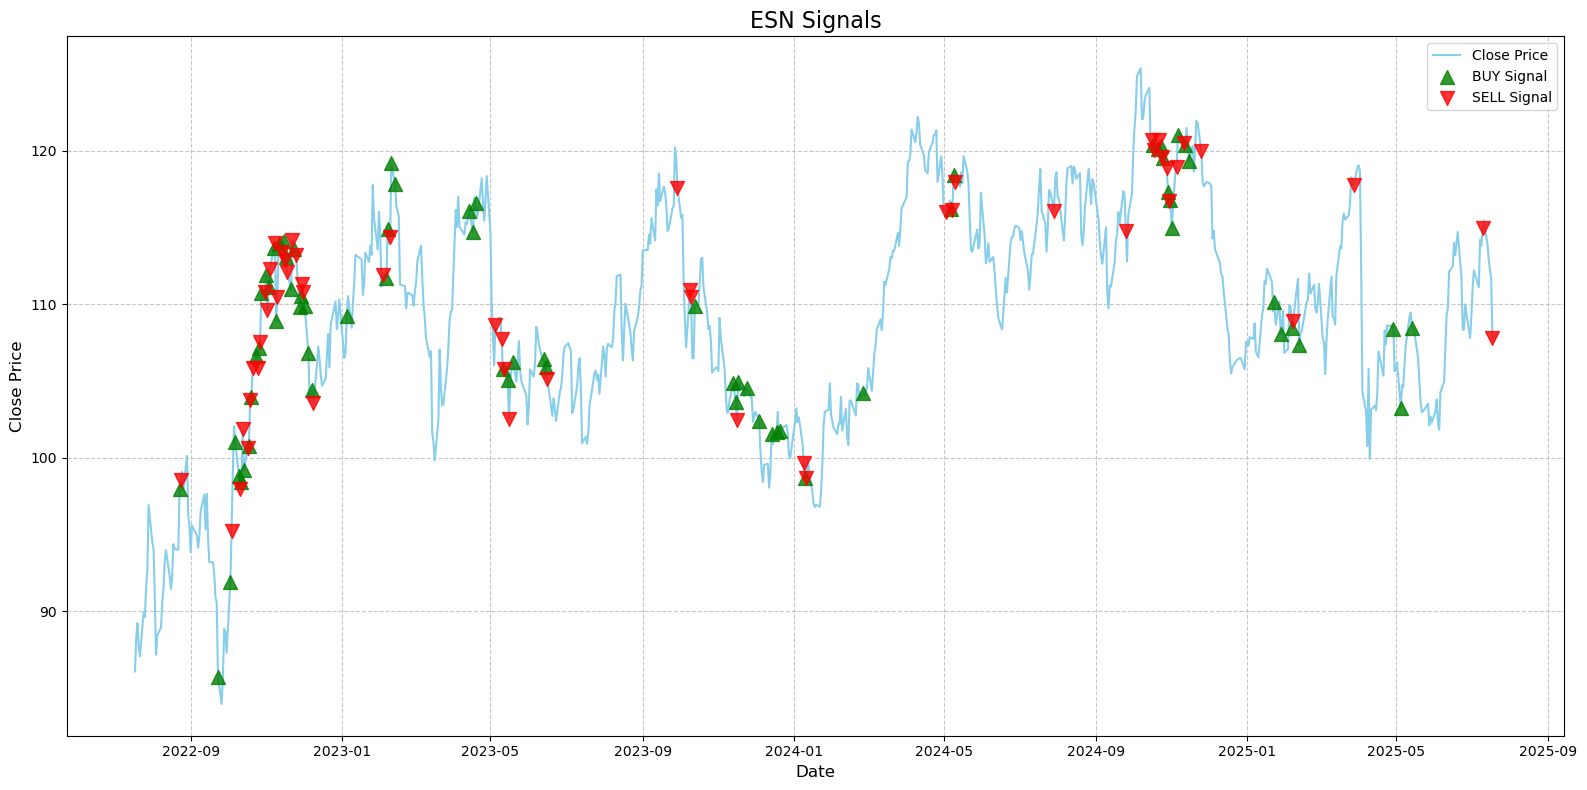

In [42]:
plot_esn_signals(test_df, signals)

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_esn_and_cpm_signals(original_df: pd.DataFrame, signals_df: pd.DataFrame, title: str = "ESN Signals with CPM Points"):
    plt.figure(figsize=(16, 8))
    plt.plot(original_df.index, original_df['Close'], label='Close Price', color='skyblue', linewidth=1.5)

    # ESN 예측 매수 신호 (BUY) 표시
    buy_signals = signals_df[signals_df['Type'] == 'BUY']
    plt.scatter(buy_signals['Index'], buy_signals['Close'],
                marker='^', color='green', s=100, label='ESN BUY Signal', alpha=0.8, zorder=5)

    # ESN 예측 매도 신호 (SELL) 표시
    sell_signals = signals_df[signals_df['Type'] == 'SELL']
    plt.scatter(sell_signals['Index'], sell_signals['Close'],
                marker='v', color='red', s=100, label='ESN SELL Signal', alpha=0.8, zorder=5)

    # --- CPM Point Type (-1: BUY, 1: SELL) 표시 추가 ---
    if 'cpm_point_type' in original_df.columns:
        cpm_buy_points = original_df[original_df['cpm_point_type'] == -1]
        cpm_sell_points = original_df[original_df['cpm_point_type'] == 1]

        # CPM BUY 포인트 (예: 마름모, 파란색)
        plt.scatter(cpm_buy_points.index, cpm_buy_points['Close'],
                    marker='D', color='blue', s=120, label='CPM BUY Point', alpha=0.6, zorder=4)

        # CPM SELL 포인트 (예: 마름모, 주황색)
        plt.scatter(cpm_sell_points.index, cpm_sell_points['Close'],
                    marker='D', color='orange', s=120, label='CPM SELL Point', alpha=0.6, zorder=4)
    else:
        print("경고: 'cpm_point_type' 컬럼이 original_df에 없어 CPM 포인트를 표시할 수 없습니다.")

    plt.title(title, fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Close Price', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

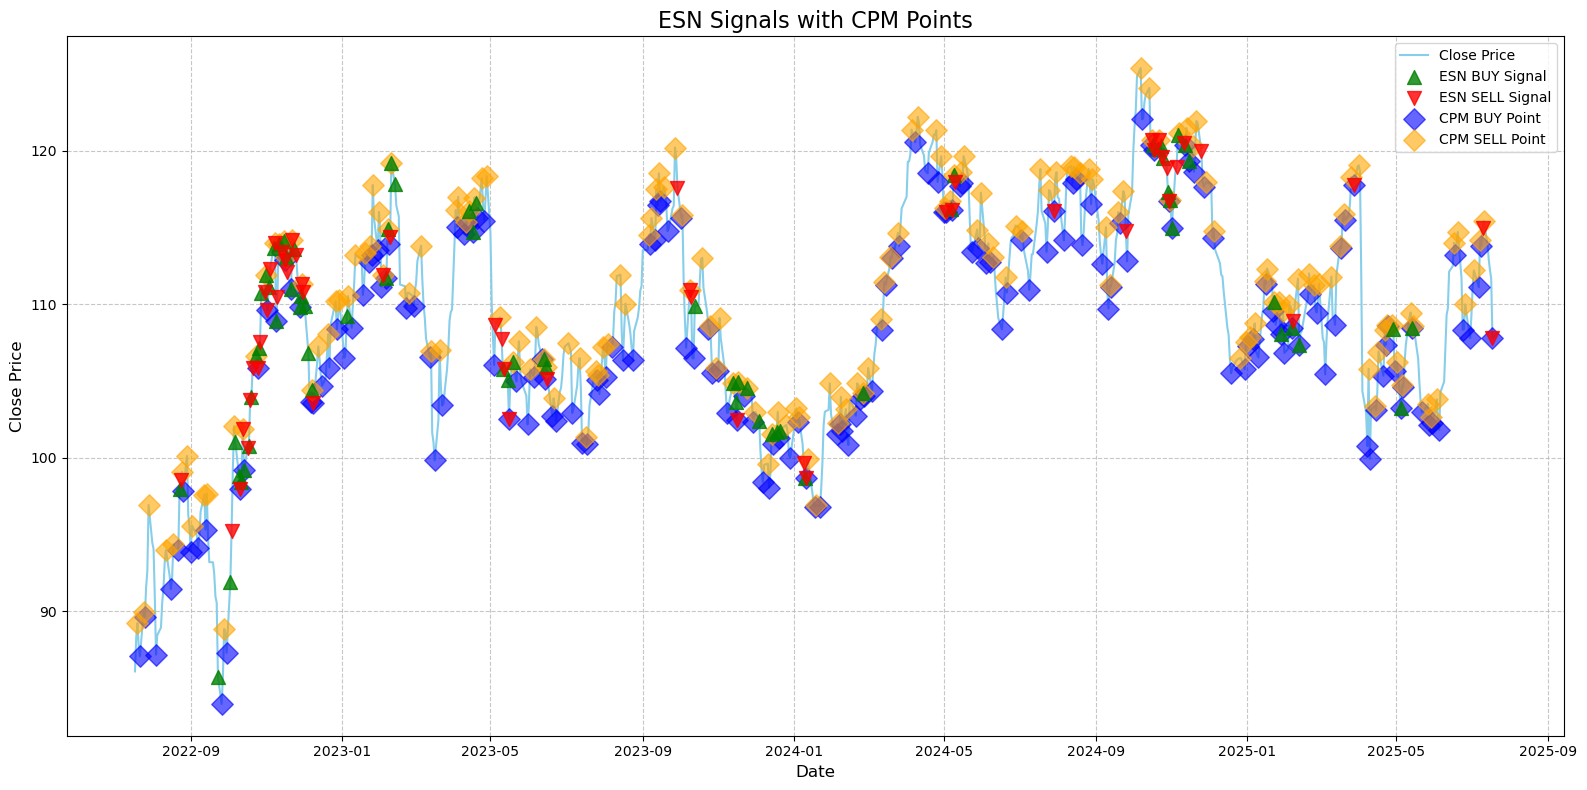

In [44]:
plot_esn_and_cpm_signals(test_df, signals)

In [45]:
import ESN_GA
from ESN_GA import run_genetic_algorithm, perform_final_backtest, PARAM_RANGES
importlib.reload(ESN_GA)

<module 'ESN_GA' from 'C:\\Users\\jpran\\Capstone\\ESN_GA.py'>

In [46]:
best_params_ga, ga_log = run_genetic_algorithm(
    train_df_ga=train_df,
    test_df_ga=test_df,
    technical_signals_list=Technical_Signals,
    pop_size=30,
    num_generations=15,
    random_seed=42
)

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

gen	nevals	avg     	std    	min     	max    
0  	30    	-14.8535	28.4301	-75.7799	47.5688


Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

1  	25    	-15.8574	30.6571	-72.4064	34.2518


Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

2  	23    	-6.79098	23.4935	-78.0432	25.7483


Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

3  	28    	-14.6199	35.4644	-78.8533	36.2825


Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

4  	27    	-4.82851	30.0909	-75.0063	39.7557


Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

5  	19    	13.0093 	19.0269	-25.1022	66.2904


Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

6  	21    	11.0974 	27.5836	-62.165 	66.2904


Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

7  	30    	7.24174 	15.8374	-21.1923	31.5506


Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

8  	21    	12.5576 	14.9618	-16.5043	30.3852


Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

9  	27    	18.5593 	14.6624	-17.4242	29.8557


Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

10 	25    	27.0703 	14.7364	-14.2196	78.4558


Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

11 	20    	25.6028 	17.5305	-28.5672	78.4558


Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

12 	23    	28.5774 	17.8148	-11.1285	83.1541


Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

13 	22    	30.9032 	24.983 	-23.5274	109.275


Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

14 	25    	22.6313 	22.3543	-17.1949	109.275


Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

15 	22    	25.0587 	12.3057	-31.366 	29.8322

GA 최적화 완료 - 최적 하이퍼파라미터: [785.3160955380868, 1.3358495858539206, 0.28440753612015934, 0.7180878746383507]
GA 최적화 완료 - 최고 Return [%]: 109.2753


In [47]:
print(best_params_ga)

[785.3160955380868, 1.3358495858539206, 0.28440753612015934, 0.7180878746383507]


In [51]:
final_backtest_stats, final_signals = perform_final_backtest(
    train_df=train_df,
    test_df=test_df,
    best_params=best_params_ga,
    technical_signals_list=Technical_Signals,
    random_state=42
)


--- 최적화된 파라미터로 최종 ESN 학습 및 백테스팅 ---
  n_reservoir: 785
  spectral_radius: 1.3358
  sparsity: 0.2844
  signal_threshold: 0.7181


Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]


최종 백테스팅 결과 (최적화된 파라미터):
Start                     2022-07-18 00:00:00
End                       2025-07-21 00:00:00
Duration                   1099 days 00:00:00
Exposure Time [%]                    62.25166
Equity Final [$]                  20927.53145
Equity Peak [$]                   21411.70461
Commissions [$]                    1970.68619
Return [%]                          109.27531
Buy & Hold Return [%]                25.49362
Return (Ann.) [%]                    27.95215
Volatility (Ann.) [%]                23.92218
CAGR [%]                             18.45146
Sharpe Ratio                          1.16846
Sortino Ratio                         2.36849
Calmar Ratio                          1.73369
Alpha [%]                            95.29171
Beta                                  0.54851
Max. Drawdown [%]                   -16.12292
Avg. Drawdown [%]                    -2.98176
Max. Drawdown Duration      182 days 00:00:00
Avg. Drawdown Duration       27 days 00:00:00
# Trades 

In [49]:
def plot_signals(original_df: pd.DataFrame, signals_df: pd.DataFrame, title: str = "ESN Signals with CPM Points"):
    plt.figure(figsize=(16, 8))
    plt.plot(original_df.index, original_df['Close'], label='Close Price', color='skyblue', linewidth=1.5)

    # ESN 예측 매수 신호 (BUY) 표시
    buy_signals = signals_df[signals_df['Predicted_Signals'] == -1]
    plt.scatter(buy_signals.index, buy_signals['Close'], # <-- 'Index' 대신 'buy_signals.index' 사용
                marker='^', color='green', s=100, label='ESN BUY Signal', alpha=0.8, zorder=5)

    # ESN 예측 매도 신호 (SELL) 표시
    sell_signals = signals_df[signals_df['Predicted_Signals'] == 1]
    plt.scatter(sell_signals.index, sell_signals['Close'], # <-- 'Index' 대신 'sell_signals.index' 사용
                marker='v', color='red', s=100, label='ESN SELL Signal', alpha=0.8, zorder=5)

    # --- CPM Point Type (-1: BUY, 1: SELL) 표시 추가 ---
    if 'cpm_point_type' in original_df.columns:
        cpm_buy_points = original_df[original_df['cpm_point_type'] == -1]
        cpm_sell_points = original_df[original_df['cpm_point_type'] == 1]

        # CPM BUY 포인트 (예: 마름모, 파란색)
        plt.scatter(cpm_buy_points.index, cpm_buy_points['Close'],
                    marker='D', color='blue', s=120, label='CPM BUY Point', alpha=0.6, zorder=4)

        # CPM SELL 포인트 (예: 마름모, 주황색)
        plt.scatter(cpm_sell_points.index, cpm_sell_points['Close'],
                    marker='D', color='orange', s=120, label='CPM SELL Point', alpha=0.6, zorder=4)
    else:
        print("경고: 'cpm_point_type' 컬럼이 original_df에 없어 CPM 포인트를 표시할 수 없습니다.")

    plt.title(title, fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Close Price', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

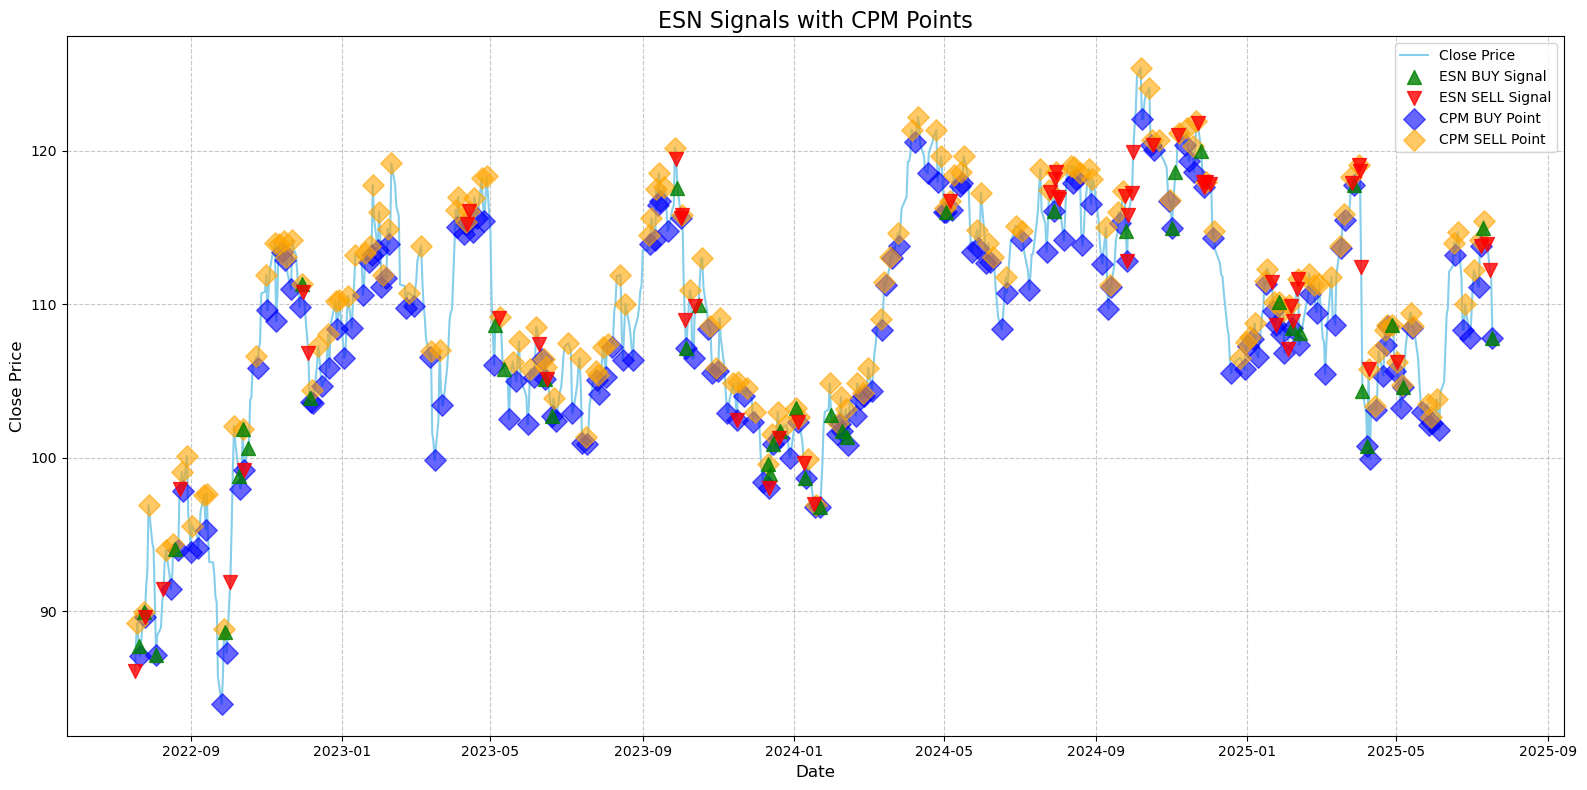

In [50]:
plot_signals(test_df, final_signals)